# Business Intelligence

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import dei pacchetti necessari

In [2]:
%%capture

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Import del dataset di training

In [3]:
# Import dataset
diabetes_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_train.csv', na_values= ' ?')

display(diabetes_train)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,Male,64.822537,0,0,never,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1
1,Male,59.912290,1,0,never,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1
2,Male,67.853267,0,0,former,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1
3,Male,57.985607,0,0,never,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1
4,Male,70.278133,0,0,current,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Female,19.354174,0,0,former,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0
584,Female,70.000000,0,0,not current,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0
585,Male,60.000000,0,1,current,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0
586,Female,27.000000,0,0,No Info,27.320000,6.000000,200.000000,NaN,5464.000000,60.704415,0


Vedo quali features presentano dati nulli

In [4]:
# Count the number of missing values for each column
diabetes_train.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
Insulin_Sensitivity_Est,111
BMI_Glucose_Interaction,0


In [5]:
print(diabetes_train.size, "\n",  diabetes_train.shape, "\n", diabetes_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   588 non-null    object 
 1   age                      588 non-null    float64
 2   hypertension             588 non-null    int64  
 3   heart_disease            588 non-null    int64  
 4   smoking_history          588 non-null    object 
 5   bmi                      588 non-null    float64
 6   HbA1c_level              588 non-null    float64
 7   blood_glucose_level      588 non-null    float64
 8   Insulin_Sensitivity_Est  477 non-null    float64
 9   BMI_Glucose_Interaction  588 non-null    float64
 10  Random_Lab_Marker        588 non-null    float64
 11  diabetes                 588 non-null    int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 55.3+ KB
7056 
 (588, 12) 
 None


# Peprocessing

Trasforming the attribute "age" to integer

In [6]:
diabetes_train['age'] = diabetes_train['age'].astype(int)

display(diabetes_train)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,Male,64,0,0,never,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1
1,Male,59,1,0,never,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1
2,Male,67,0,0,former,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1
3,Male,57,0,0,never,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1
4,Male,70,0,0,current,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Female,19,0,0,former,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0
584,Female,70,0,0,not current,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0
585,Male,60,0,1,current,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0
586,Female,27,0,0,No Info,27.320000,6.000000,200.000000,NaN,5464.000000,60.704415,0


Changing the value "no info" of the feature "smoking_history" into...(da decidere come trattare)

In [7]:
diabetes_train['smoking_history'] = diabetes_train['smoking_history'].replace('No Info', 'current')


display(diabetes_train)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,Male,64,0,0,never,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1
1,Male,59,1,0,never,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1
2,Male,67,0,0,former,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1
3,Male,57,0,0,never,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1
4,Male,70,0,0,current,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Female,19,0,0,former,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0
584,Female,70,0,0,not current,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0
585,Male,60,0,1,current,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0
586,Female,27,0,0,current,27.320000,6.000000,200.000000,NaN,5464.000000,60.704415,0


Valori nulli nella feature "Insulin_Sensitivity_Est" da trattare in modo diverso

In [8]:
# Replace NaN values with the most frequent value for non-numerical columns
# Fill NaNs in numerical columns with mean (or median)
for col in diabetes_train.select_dtypes(include=np.number).columns:
    mean_val = diabetes_train[col].mean()
    diabetes_train[col].fillna(mean_val, inplace=True)

display(diabetes_train)

<ipython-input-8-21406117d634>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_train[col].fillna(mean_val, inplace=True)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,Male,64,0,0,never,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1
1,Male,59,1,0,never,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1
2,Male,67,0,0,former,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1
3,Male,57,0,0,never,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1
4,Male,70,0,0,current,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Female,19,0,0,former,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0
584,Female,70,0,0,not current,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0
585,Male,60,0,1,current,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0
586,Female,27,0,0,current,27.320000,6.000000,200.000000,0.802415,5464.000000,60.704415,0


In [9]:
print(diabetes_train.isna().sum())

gender                     0
age                        0
hypertension               0
heart_disease              0
smoking_history            0
bmi                        0
HbA1c_level                0
blood_glucose_level        0
Insulin_Sensitivity_Est    0
BMI_Glucose_Interaction    0
Random_Lab_Marker          0
diabetes                   0
dtype: int64


In [10]:
diabetes_train['diabetes'].value_counts()

,count
diabetes,
0,441
1,147


In [11]:
diabetes_train.describe

<bound method NDFrame.describe of      gender  age  hypertension  heart_disease smoking_history        bmi  \
0      Male   64             0              0           never  27.097915   
1      Male   59             1              0           never  33.206670   
2      Male   67             0              0          former  30.639790   
3      Male   57             0              0           never  32.609541   
4      Male   70             0              0         current  37.703827   
..      ...  ...           ...            ...             ...        ...   
583  Female   19             0              0          former  28.670601   
584  Female   70             0              0     not current  24.750000   
585    Male   60             0              1         current  29.050000   
586  Female   27             0              0         current  27.320000   
587    Male   80             0              0            ever  17.350000   

     HbA1c_level  blood_glucose_level  Insulin_Sensitivity_Est  \
0       6.517746           157.338059                 1.220942   
1       7.971341           148.625701                 0.807652   
2       8.919297           240.733664                 1.225950   
3       8.759698           154.640163                 1.432736   
4       6.261874           169.415511                 0.684205   
..           ...                  ...                      ...   
583     5.248329           160.905601                 0.959618   
584     3.500000           159.000000                -1.084071   
585     5.800000           145.000000                -0.468180   
586     6.000000           200.000000                 0.802415   
587     3.500000           130.000000                -0.596994   

     BMI_Glucose_Interaction  Random_Lab_Marker  diabetes  
0                4262.942153          38.820127         1  
1                4932.729931          40.381336         1  
2                7372.749574          55.789060         1  
3                5039.552869          40.877685         1  
4                6267.482417          53.671280         1  
..                       ...                ...       ...  
583              4808.000000          52.632201         0  
584              3935.250000          43.652306         0  
585              4212.250000          58.503956         0  
586              5464.000000          60.704415         0  
587              2255.500000          35.951112         0  

[588 rows x 12 columns]>

Encoding delle features "gender" e "smoking_history"

One-hot encoding

In [12]:
# Encoding

labelenc_class = LabelEncoder()
labelenc_class.fit(diabetes_train['gender'].values)
diabetes_train['gender'] = labelenc_class.transform(diabetes_train['gender'].values)

labelenc_class = LabelEncoder()
labelenc_class.fit(diabetes_train['smoking_history'].values)
diabetes_train['smoking_history'] = labelenc_class.transform(diabetes_train['smoking_history'].values)

display(diabetes_train)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,1,64,0,0,3,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1
1,1,59,1,0,3,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1
2,1,67,0,0,2,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1
3,1,57,0,0,3,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1
4,1,70,0,0,0,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...,...
583,0,19,0,0,2,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0
584,0,70,0,0,4,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0
585,1,60,0,1,0,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0
586,0,27,0,0,0,27.320000,6.000000,200.000000,0.802415,5464.000000,60.704415,0


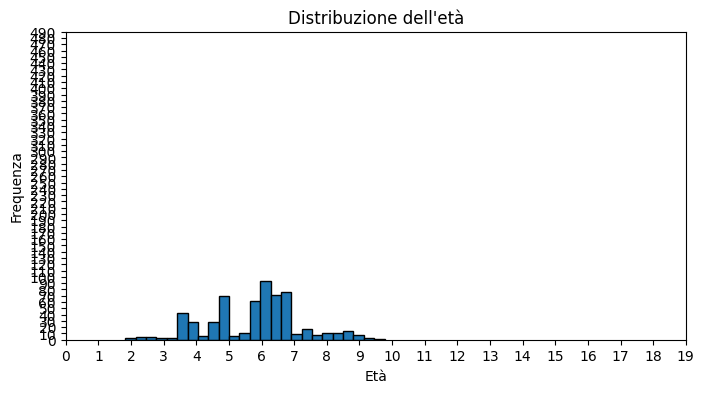

In [13]:

plt.figure(figsize=(8, 4))
plt.hist(diabetes_train['HbA1c_level'], bins=25, edgecolor='black')
plt.title('Distribuzione dell\'età')
plt.xlabel('Età')
plt.ylabel('Frequenza')
plt.xticks(ticks=np.arange(0,20,1), labels=[f'{i}' for i in range(0,20,1)])
plt.yticks(ticks=np.arange(0,500,10), labels=[f'{i}' for i in range(0,500,10)])
plt.grid(False)
plt.show()


In [14]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

diabetes_train['age'] = scaler.fit_transform(diabetes_train['age'].values.reshape(-1, 1))
diabetes_train['bmi'] = scaler.fit_transform(diabetes_train['bmi'].values.reshape(-1, 1))
diabetes_train['HbA1c_level'] = scaler.fit_transform(diabetes_train['HbA1c_level'].values.reshape(-1, 1))
diabetes_train['blood_glucose_level'] = scaler.fit_transform(diabetes_train['blood_glucose_level'].values.reshape(-1, 1))
diabetes_train['BMI_Glucose_Interaction'] = scaler.fit_transform(diabetes_train['BMI_Glucose_Interaction'].values.reshape(-1, 1))
diabetes_train['Random_Lab_Marker'] = scaler.fit_transform(diabetes_train['Random_Lab_Marker'].values.reshape(-1, 1))

display(diabetes_train)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,1,0.8000,0,0,3,0.161773,0.590557,0.363743,1.220942,0.267677,0.364301,1
1,1,0.7375,1,0,3,0.236425,0.773548,0.324886,0.807652,0.327131,0.394142,1
2,1,0.8375,0,0,2,0.205057,0.892885,0.735678,1.225950,0.543722,0.688649,1
3,1,0.7125,0,0,3,0.229128,0.872793,0.351710,1.432736,0.336613,0.403630,1
4,1,0.8750,0,0,0,0.291382,0.558346,0.417607,0.684205,0.445612,0.648169,1
...,...,...,...,...,...,...,...,...,...,...,...,...
583,0,0.2375,0,0,2,0.180992,0.430752,0.379654,0.959618,0.316060,0.628308,0
584,0,0.8750,0,0,4,0.133081,0.210658,0.371155,-1.084071,0.238589,0.456664,0
585,1,0.7500,0,1,0,0.185629,0.500201,0.308716,-0.468180,0.263177,0.740542,0
586,0,0.3375,0,0,0,0.164487,0.525379,0.554010,0.802415,0.374290,0.782602,0


Removing BMI??

In [15]:
del diabetes_train['BMI_Glucose_Interaction']

display(diabetes_train)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,Random_Lab_Marker,diabetes
0,1,0.8000,0,0,3,0.161773,0.590557,0.363743,1.220942,0.364301,1
1,1,0.7375,1,0,3,0.236425,0.773548,0.324886,0.807652,0.394142,1
2,1,0.8375,0,0,2,0.205057,0.892885,0.735678,1.225950,0.688649,1
3,1,0.7125,0,0,3,0.229128,0.872793,0.351710,1.432736,0.403630,1
4,1,0.8750,0,0,0,0.291382,0.558346,0.417607,0.684205,0.648169,1
...,...,...,...,...,...,...,...,...,...,...,...
583,0,0.2375,0,0,2,0.180992,0.430752,0.379654,0.959618,0.628308,0
584,0,0.8750,0,0,4,0.133081,0.210658,0.371155,-1.084071,0.456664,0
585,1,0.7500,0,1,0,0.185629,0.500201,0.308716,-0.468180,0.740542,0
586,0,0.3375,0,0,0,0.164487,0.525379,0.554010,0.802415,0.782602,0


In [16]:
diabetes_train.iloc[:, :-1].corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,Random_Lab_Marker
gender,1.000000,0.035402,-0.038990,0.093186,-0.182320,-0.062657,0.224807,0.091925,0.078657,0.053820
age,0.035402,1.000000,0.203213,0.166497,0.282882,0.277611,0.209100,0.250991,0.055803,-0.092326
hypertension,-0.038990,0.203213,1.000000,0.050150,0.136870,0.235991,0.145559,0.054696,-0.097201,-0.104143
heart_disease,0.093186,0.166497,0.050150,1.000000,-0.054948,-0.007833,-0.081824,-0.069721,0.036636,0.078138
smoking_history,-0.182320,0.282882,0.136870,-0.054948,1.000000,0.163099,0.061354,0.183090,0.025927,-0.106374
bmi,-0.062657,0.277611,0.235991,-0.007833,0.163099,1.000000,0.129822,0.223251,-0.135558,-0.028043
HbA1c_level,0.224807,0.209100,0.145559,-0.081824,0.061354,0.129822,1.000000,0.402934,0.089535,-0.036068
blood_glucose_level,0.091925,0.250991,0.054696,-0.069721,0.183090,0.223251,0.402934,1.000000,-0.041427,-0.094993
Insulin_Sensitivity_Est,0.078657,0.055803,-0.097201,0.036636,0.025927,-0.135558,0.089535,-0.041427,1.000000,0.070337
Random_Lab_Marker,0.053820,-0.092326,-0.104143,0.078138,-0.106374,-0.028043,-0.036068,-0.094993,0.070337,1.000000


In [17]:
# Dividing data in features and labels

X_train = diabetes_train.iloc[:, :-1].values
y_train = diabetes_train['diabetes'].values


In [18]:
diabetes_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_test.csv')

# Dividing data in features and labels

# Replace NaN values with the most frequent value for non-numerical columns
# Fill NaNs in numerical columns with mean (or median)
for col in diabetes_test.select_dtypes(include=np.number).columns:
    mean_val = diabetes_test[col].mean()
    diabetes_test[col].fillna(mean_val, inplace=True)

labelenc_class = LabelEncoder()
labelenc_class.fit(diabetes_test['gender'].values)
diabetes_test['gender'] = labelenc_class.transform(diabetes_test['gender'].values)

labelenc_class = LabelEncoder()
labelenc_class.fit(diabetes_test['smoking_history'].values)
diabetes_test['smoking_history'] = labelenc_class.transform(diabetes_test['smoking_history'].values)

diabetes_test['age'] = scaler.fit_transform(diabetes_test['age'].values.reshape(-1, 1))
diabetes_test['bmi'] = scaler.fit_transform(diabetes_test['bmi'].values.reshape(-1, 1))
diabetes_test['HbA1c_level'] = scaler.fit_transform(diabetes_test['HbA1c_level'].values.reshape(-1, 1))
diabetes_test['blood_glucose_level'] = scaler.fit_transform(diabetes_test['blood_glucose_level'].values.reshape(-1, 1))
diabetes_test['BMI_Glucose_Interaction'] = scaler.fit_transform(diabetes_test['BMI_Glucose_Interaction'].values.reshape(-1, 1))
diabetes_test['Random_Lab_Marker'] = scaler.fit_transform(diabetes_test['Random_Lab_Marker'].values.reshape(-1, 1))

del diabetes_test['BMI_Glucose_Interaction']

X_test = diabetes_test.iloc[:, :-1].values
y_test = diabetes_test['diabetes'].values

display(diabetes_test)

<ipython-input-18-ecef81e9d337>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_test[col].fillna(mean_val, inplace=True)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,Random_Lab_Marker,diabetes
0,1,0.914043,0,0,3,0.390655,0.966138,1.000000,1.874574,0.569570,1
1,0,0.690448,0,0,4,0.578436,0.128765,0.242085,0.264573,0.817273,1
2,1,0.897163,0,0,0,0.391082,0.959601,0.994566,1.927612,0.566342,1
3,1,0.814089,0,0,4,0.386001,0.547567,0.361670,1.388626,0.368396,1
4,0,0.689984,0,0,4,0.755864,0.505424,1.000000,0.601001,0.635142,1
...,...,...,...,...,...,...,...,...,...,...,...
143,0,0.619335,0,0,4,0.378072,0.273435,0.227273,0.819003,0.213883,0
144,0,0.680733,0,0,4,0.390655,0.401038,0.090909,0.439735,0.703095,0
145,0,0.471981,0,0,0,0.390655,0.273435,0.272727,1.346416,0.420437,0
146,0,0.165354,0,0,0,0.389121,0.110855,0.363471,-0.630595,0.839962,0


In [19]:
# Accuracy of SVM hard

C_hard = 1e10
loss = 'squared_hinge'
dual = False

lsvm_hard = LinearSVC(C=C_hard, loss=loss, dual=dual)

lsvm_hard.fit(X_train, y_train)


df_lsvm_hard = pd.DataFrame({'acc.': [np.round(lsvm_hard.score(X_train, y_train)*100, decimals=2), np.round(lsvm_hard.score(X_test, y_test)*100, decimals=2)]},
                            index=['training', 'test'])
display(df_lsvm_hard)


,acc.
training,94.22
test,85.14


In [21]:
# Sigmoid Kernel

ker_tanh = 'sigmoid'
gamma_tanh = 'auto'

C = 100

svm_tanh = SVC(C=C, kernel=ker_tanh, gamma=gamma_tanh)

svm_tanh.fit(X_train, y_train)

df_svm_tanh = pd.DataFrame({'acc. ': [np.round(svm_tanh.score(X_train, y_train)*100, decimals=2), np.round(svm_tanh.score(X_test, y_test)*100, decimals=2)]},
                          index=['training', 'test'])

df_styled=df_svm_tanh.style.set_caption('SVM SIGMOID')
display(df_styled)

,acc.
training,72.790000
test,72.300000


In [22]:
# Rbf Kernel
ker_rbf = 'rbf'
gamma_rbf = 'auto'

C = 100

svm_rbf = SVC(C=C, kernel=ker_rbf, gamma=gamma_rbf)


svm_rbf.fit(X_train, y_train)


df_svm_rbf = pd.DataFrame({'acc. ': [np.round(svm_rbf.score(X_train, y_train)*100, decimals=2), np.round(svm_rbf.score(X_test, y_test)*100, decimals=2)]},
                          index=['training', 'test'])
df_styled=df_svm_rbf.style.set_caption('SVM RBF')
display(df_styled)

,acc.
training,96.600000
test,87.160000
